In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv(r"Dataset\Mall_Customers.csv", encoding='latin-1')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19848\1307076224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19848\1307076224.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gen

In [6]:
data.drop('CustomerID' , axis=1)
data.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

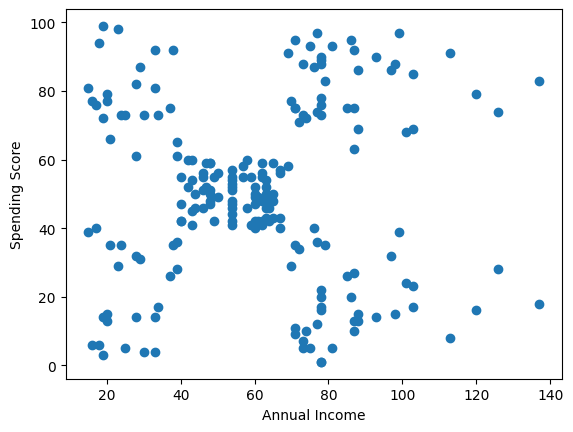

In [7]:
plt.scatter(data['Annual Income'],data['Spending Score'])
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')
plt.show()

In [8]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [9]:
label=kmeans.predict(data)
centroids=kmeans.cluster_centers_

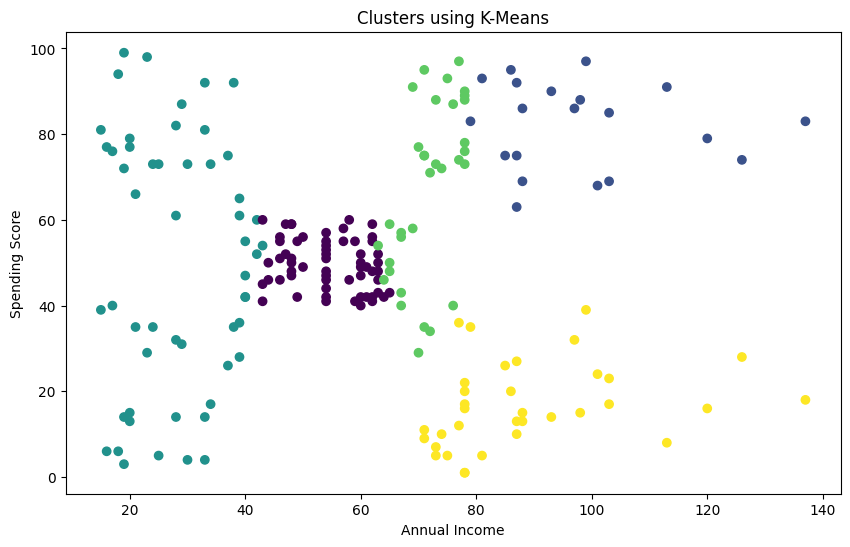

In [10]:
fig=plt.figure(figsize=(10,6))
plt.scatter(data['Annual Income'], data['Spending Score'], c=label)
plt.title("Clusters using K-Means")
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')
plt.show()

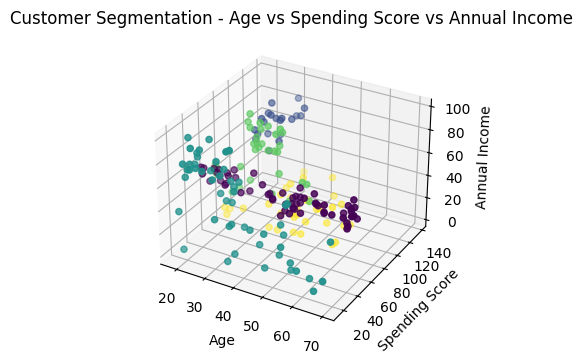

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

scatter=ax.scatter(data['Age'],data['Annual Income'],data['Spending Score'], c=label,cmap='viridis', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
ax.set_title('Customer Segmentation - Age vs Spending Score vs Annual Income')
# colorbar = plt.colorbar(scatter)
# colorbar.set_label('Cluster')
plt.show()